# Mini-Project: Interpreting correlation

## Scenario
You are a data analyst working for a large investment firm in London. The organisation is considering offering medical insurance as an employment benefit, but the management team needs to consider the potential cost of claims before they make any decisions. The team has received quotes from five medical insurers, and the cost of the insurance varies widely.

One insurer has delivered a very competitive quote, but the downside is that the cost per person would vary depending on certain criteria set by the insurance company. These criteria include smoking status and body mass index (BMI). The insurance would be affordable for all non-smokers and those with a BMI in the range of 18–24, but any employee outside of these categories would have to pay an additional monthly contribution. This may lead to the management team being accused of bias against these employees, as some employees would receive free insurance while others would have to pay.

Your company is considering developing more targeted insurance plans and policies based on individual lifestyles. This would involve offering incentives for healthier living or adjusting premiums based on certain lifestyle choices. However, before implementing these changes, the company wants to gather evidence of any correlations between lifestyle choices and insurance costs.
Your organisation would like to be able to evidence the impact of lifestyle choices on the medical insurance costs so that it can explain why some employees would have to pay extra to be in the scheme. To gather this evidence, it would like to explore the correlations between lifestyle choices and potential insurance costs.

The data set includes demographic data (age and sex) and health and lifestyle data (BMI, number of children, and smoker status). The management team would like you to explore which of these factors would have a significant effect on insurance costs.


## Objective
Your goal is to identify correlations in an anonymised data set that contains information about individuals and their medical insurance costs.


In [ ]:
# Import libraries
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt #Visualisation
import seaborn as sns #Visualisation

data = pd.read_csv("https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/insurance.csv")


In [ ]:
print(data.shape)
data.head()

(1000, 5)


,age,bmi,number_of_children,smoker,charges
0,47,29.45,1,0,25000
1,34,32.14,0,0,24666
2,39,21.62,1,0,18301
3,52,25.84,1,0,19252
4,48,26.82,1,0,24014


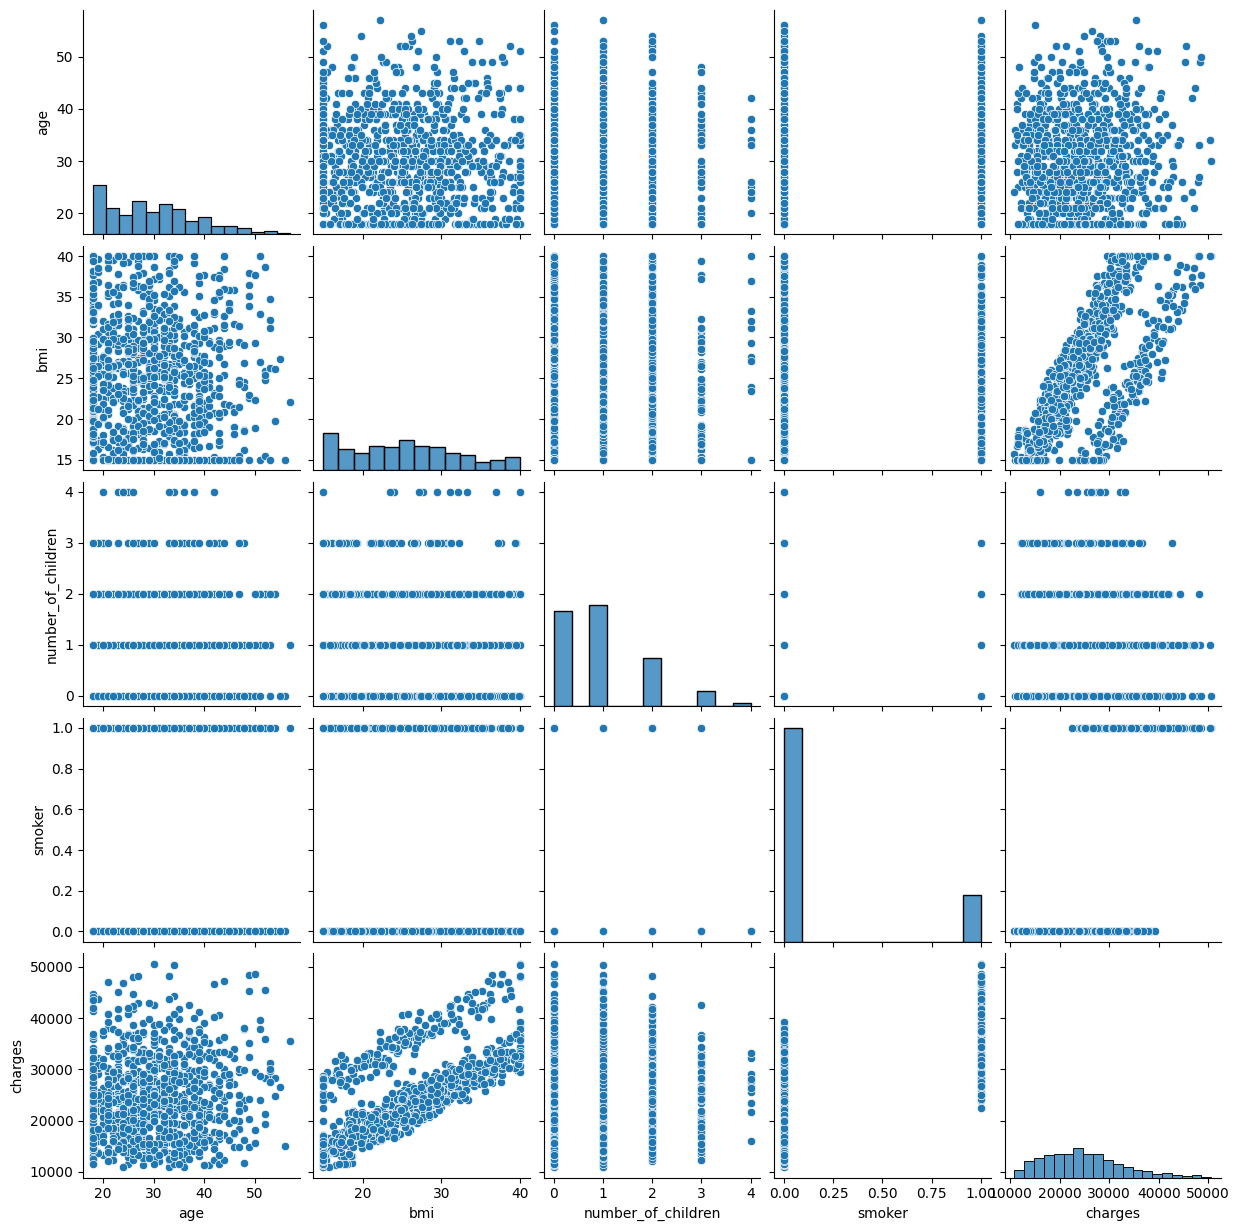

In [ ]:
sns.pairplot(data)

Straight away the variables that look to interact in a way that would suggest sopme level of correlation:

BMI & Charges <br>

Smoker + Charges

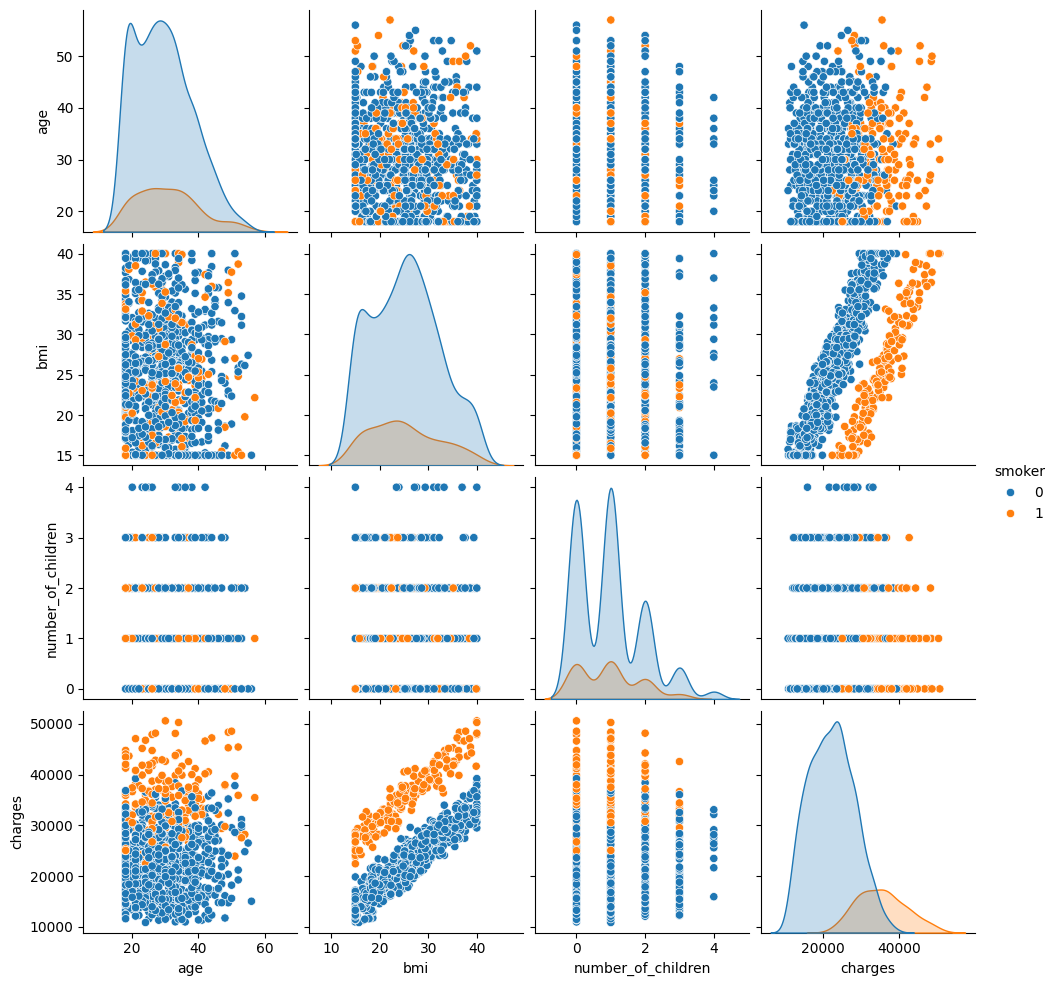

In [ ]:
sns.pairplot(data, hue="smoker")

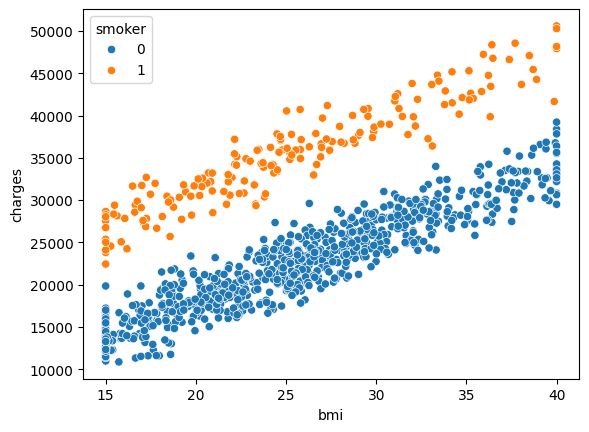

In [ ]:
sns.scatterplot(x="bmi", y="charges", data=data, hue="smoker")
plt.show()

Text(0.5, 1.0, 'Age vs Charges')

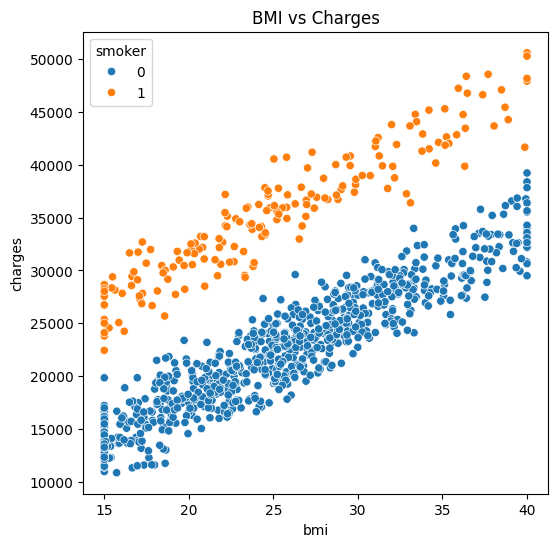

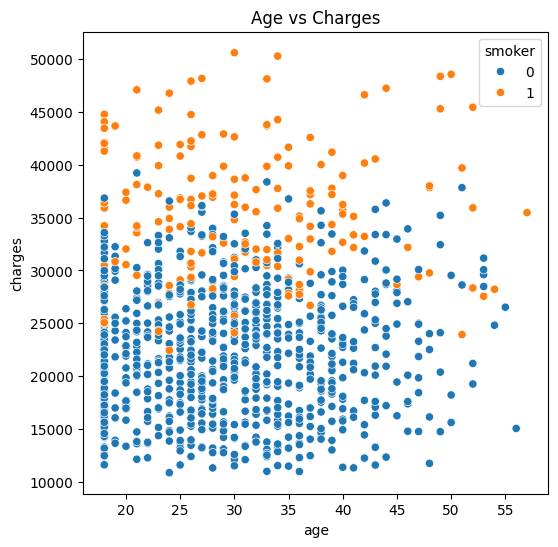

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='bmi', y='charges', data=data, hue="smoker")
plt.title('BMI vs Charges')

plt.figure(figsize=(6,6))
sns.scatterplot(x='age', y='charges', data=data, hue="smoker")
plt.title('Age vs Charges')


Text(0.5, 1.0, 'Age vs Charges')

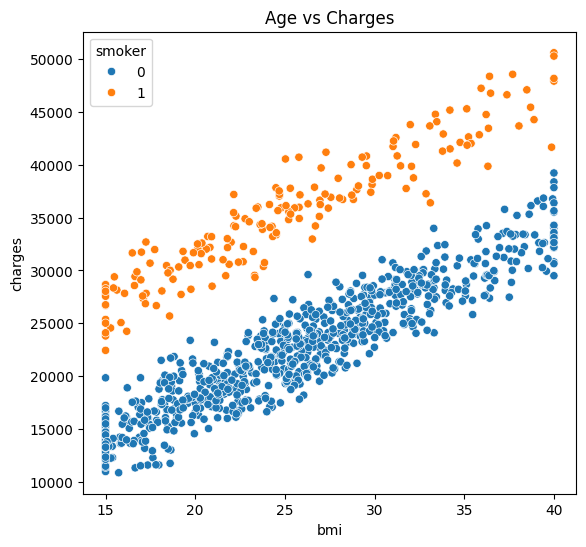

In [ ]:
3plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
sns.scatterplot(x='bmi', y='charges', data=data, hue="smoker")
plt.title('Age vs Charges')

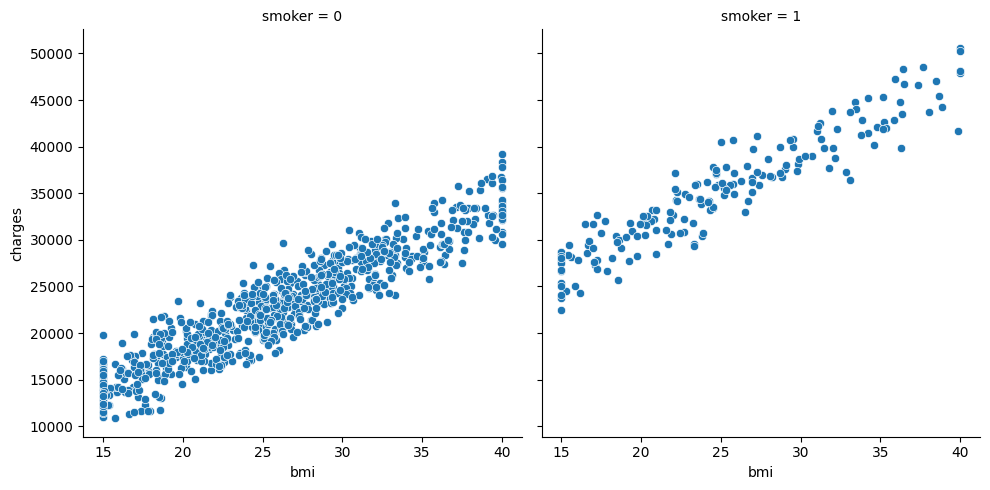

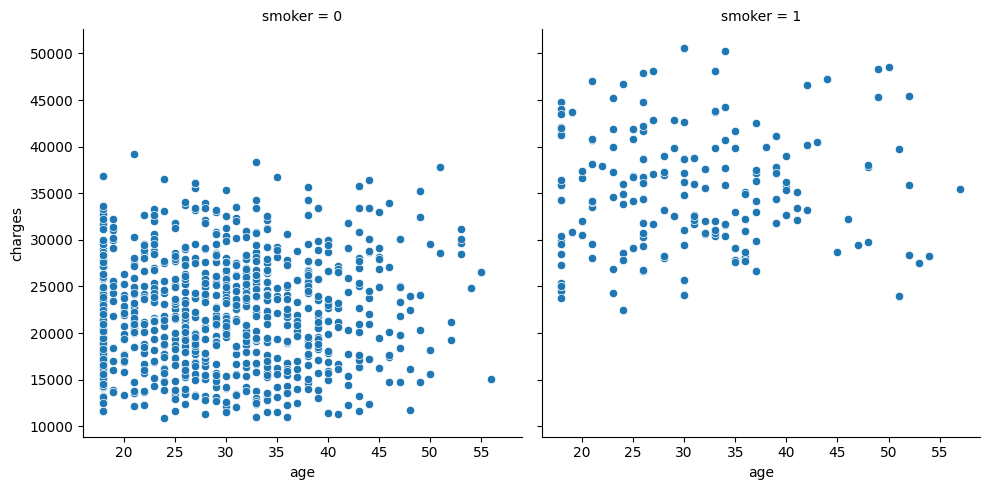

In [ ]:
sns.relplot(x="bmi", y="charges", data=data, kind="scatter", col="smoker")
plt.show()

sns.relplot(x="age", y="charges", data=data, kind="scatter", col="smoker")
plt.show()

BMI: Both look linear, and the difference in equation looks like just a costant charge = m*bmi + smoker

Age: Also looks like a translation up in the y axis

So since both the relationship of Age and Charges and BMI and Charges appear linear,

In [ ]:
# Import the required library.
from scipy.stats import pearsonr

# Calculate Pearson correlation for BMS vs charges.
pearson_corr, pearson_p_value = pearsonr(data['bmi'],
                                         data['charges'])

# View the output.
print("Testing BMI against charges:")
print("\nPearson correlation coefficient:", pearson_corr)
print("Pearson p-value:", pearson_p_value)

# Calculate Pearson correlation for smoker vs charges.
pearson_corr, pearson_p_value = pearsonr(data['smoker'],
                                         data['charges'])

# View the output.
print("Testing smoker against charges:")
print("\nPearson correlation coefficient:", pearson_corr)
print("Pearson p-value:", pearson_p_value)

Testing BMI against charges:

Pearson correlation coefficient: 0.7087713530017028
Pearson p-value: 2.0579566103102778e-153
Testing smoker against charges:

Pearson correlation coefficient: 0.6459429037873878
Pearson p-value: 3.7154707874395917e-119


High pearson coefficient suggesting there is a correlation
low p-value so we can be confident with this result

Not necessarily causal though, as seen in the coffee experiment

In [ ]:
#inspired from Jason's methodlogy on the week 2 lecture

from scipy.stats import pearsonr, spearmanr

bmi_charges_r, bmi_charges_p_val = pearsonr(data['bmi'], data['charges'])

age_charges_r, age_charges_p_val = pearsonr(data['age'], data['charges'])

smoker_r, smoker_p_val = spearmanr(data['smoker'], data['charges'])
number_of_children_r, number_of_children_p_val = spearmanr(data['number_of_children'], data['charges'])

correlation_results = pd.DataFrame({
    'Variable' : ['bmi', 'age', 'smoker', 'number_of_children'],
    'Test' : ['pearson', 'pearson', 'spearman', 'spearman'],
    'R value' : [bmi_charges_r, age_charges_r, smoker_r, number_of_children_r],
    'p-value' : [bmi_charges_p_val, age_charges_p_val, smoker_p_val, number_of_children_p_val]
})

correlation_results['reject?'] = correlation_results['p-value'].apply(lambda x: 'Reject' if x < 0.05 else 'Fail to Reject')

correlation_results.head()


#although this doesnt really make sense does it lol? does reject and fail to reject need to be other way round? we should be using bmi and smoker. we shouldnt be using age though. small r value -> so fix this at some point

,Variable,Test,R value,p-value,reject?
0,bmi,pearson,0.708771,2.057957e-153,Reject
1,age,pearson,0.079700,1.169591e-02,Reject
2,smoker,spearman,0.581555,1.504651e-91,Reject
3,number_of_children,spearman,0.049479,1.178968e-01,Fail to Reject


In [ ]:
a = data[data['smoker'] == 0] ['charges'].mean()
b = data[data['smoker'] == 1] ['charges'].mean()

b - a

#This is how many charges smoking adds you

13023.374597777914

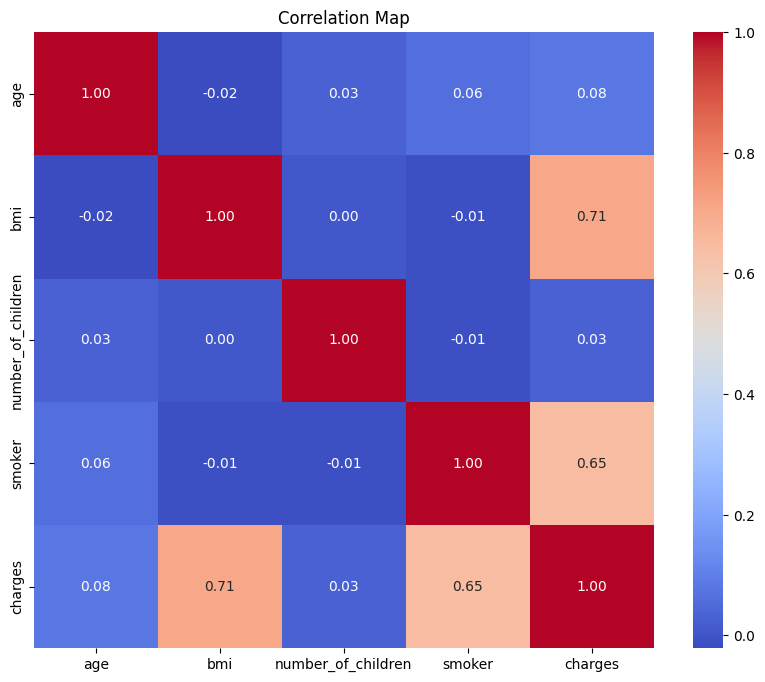

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Map')
plt.show()